# Sequential Models
## Vanilla Recurrent Neural Networks (RNNs)

All the neural architectures discussed in earlier chapters are inherently designed for multi-
dimensional data in which the attributes are largely independent of one another. However,
certain data types such as time-series, text, and biological data contain sequential depen-
dencies among the attributes. Examples of such dependencies are as follows:

- In a time-series data set, the values on successive time-stamps are closely related to one another. If one uses the values of these time-stamps as independent features, then key information about the relationships among the values of these time-stamps is lost. For example, the value of a time-series at time $t$ is closely related to its values in the previous window. However, this information is lost when the values at individual time-stamps are treated independently of one another.

- One can obtain better semantic insights when the ordering of the words is used. In such cases, it is important to construct models that take the sequencing information into account. Text data is the most common use case of recurrent neural networks.

- Biological data often contains sequences, in which the symbols might correspond to amino acids or one of the nucleobases that form the building blocks of DNA.

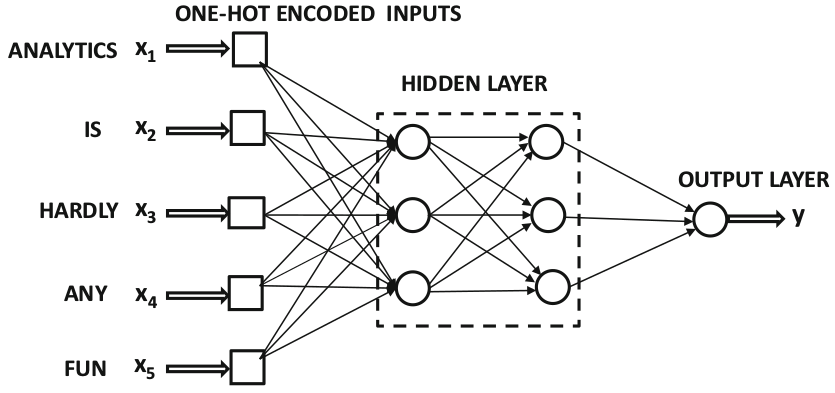

In [1]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./img/nnrnn.png",width=500, height=500)

An attempt to use a conventional neural network for sentiment analysis faces
the challenge of variable-length inputs. The network architecture also does not contain any
helpful information about sequential dependencies among successive words. Any sentence with less than five words would have missing inputs. *It is important to somehow
encode information about the word ordering more directly within the architecture of the network*. The goal of such an approach would be to reduce the parameter requirements
with increasing sequence length; recurrent neural networks provide an excellent example
of (parameter-wise) frugal architectural design with the help of domain-specific insights.

These desiderata are naturally satisfied with the use of recurrent neural networks
(RNNs). In a recurrent neural network, there is a one-to-one correspondence between the
layers in the network and the specific positions in the sequence. The position in the sequence
is also referred to as its *time-stamp*. Therefore, instead of a variable number of inputs in a
single input layer, the network contains a variable number of layers, and each layer has a
single input corresponding to that time-stamp.

Each layer uses the same set of parameters to ensure similar modeling at each time stamp, and
therefore the number of parameters is fixed as well. In other words, the same layer-wise
architecture is repeated in time, and therefore the network is referred to as recurrent. Re-
current neural networks are also feed-forward networks with a specific structure based on the
notion of time layering, so that they can take a sequence of inputs and produce a sequence
of outputs.

Some examples of applications include the following:

- The input might be a sequence of words, and the output might be the same sequence shifted by 1, so that we are predicting the next word at any given point. This is a classical **language model** in which we are trying the predict the next word based on the sequential history of words. Language models have a wide variety of applications in text mining and information retrieval.

- In a real-valued time-series, the problem of learning the next element is equivalent to **autoregressive analysis**. However, a recurrent neural network can learn far more complex models than those obtained with traditional time-series modeling.

- The input might be a sentence in one language, and the output might be a sentence in another language. In this case, one can hook up two recurrent neural networks to learn the translation models between the two languages. One can even hook up a recurrent network with a different type of network (e.g., convolutional neural network) to learn captions of images.

- The input might be a sequence (e.g., sentence), and the output might be a vector of class probabilities, which is triggered by the end of the sentence. This approach is useful for sentence-centric classification applications like **sentiment analysis**.

### Turing Completeness
Recurrent neural networks are known to be Turing complete. Turing completeness
means that a recurrent neural network can simulate any algorithm, given enough data and
computational resources. This property is, however, not very useful in practice because
the amount of data and computational resources required to achieve this goal in arbitrary
settings can be unrealistic.

### The Model

The focus of this week will be mostly on discrete RNNs, since that is the most
popular use case. Note that exactly the same neural network can be used both for building
a word-level RNN and a character-level RNN. The only difference between the two is the set
of base symbols used to define the sequence. For consistency, we will stick to the word-level
RNN while introducing the notations and definitions.


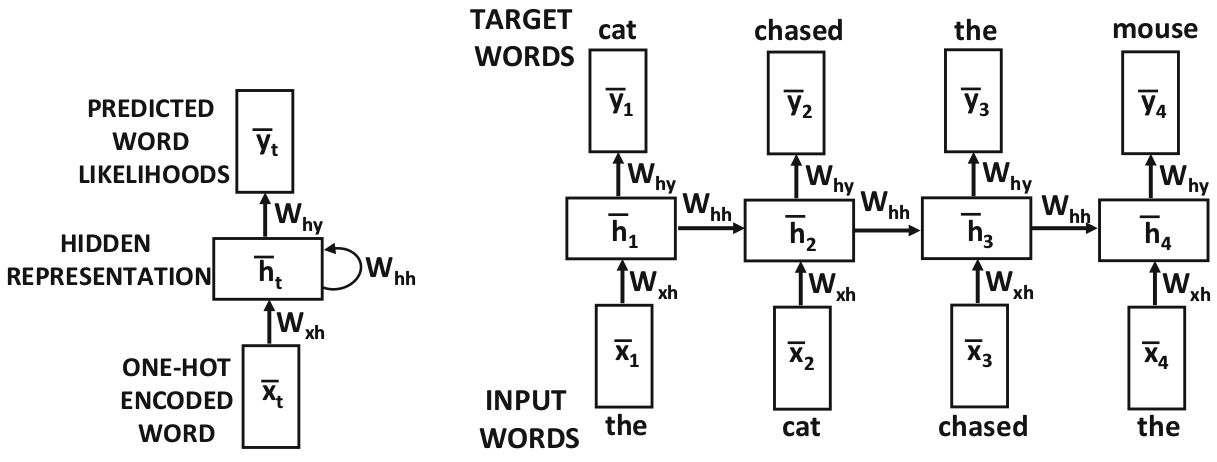

In [4]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./img/rnn1.png",width=800, height=800)

A key point here is the presence of the self-loop in leftmost image, which will cause the hidden state of the neural network to change after the input of each word in the sequence. In practice, one only works
with sequences of finite length, and it makes sense to unfold the loop into a “time-layered”
network that looks more like a feed-forward network. This network is shown in righmost image This representation is
mathematically equivalent to leftmost image. The weight matrices in different temporal layers are
shared to ensure that the same function is used at each time-stamp. The annotations $W_{xh}$,
$W_{hh}$ ,and $W_{hy}$ of the weight matrices in righmost image make the sharing evident.

n practice, it is possible for either the input or the output units
to be missing at any particular time-stamp. Examples of cases with missing inputs and
outputs are shown in below image. The choice of missing inputs and outputs would depend
on the specific application at hand.

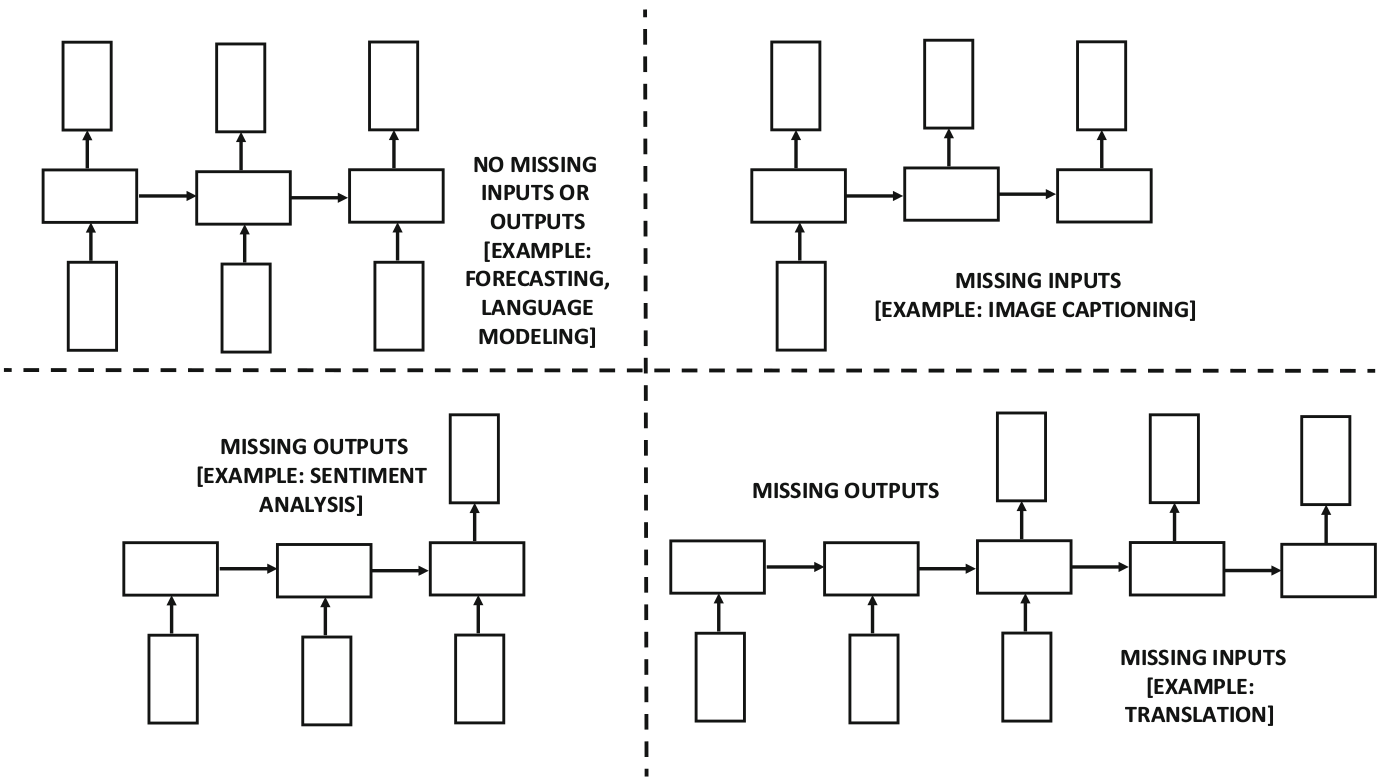

In [5]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./img/rnn2.png",width=800, height=800)

Both $x_t$ and $y_t$ are $d$ dimensional for a lexicon of size $d$. The hidden vector $h_t$ is $p$ dimensional, where $p$ regulates the complexity of the embedding. For the purpose of discussion, we will assume that these vectors are column vectors. In many applications like classification, the output is not produced at each
time unit but is only triggered at the last time-stamp in the end of the sentence. Although
output and input units may be present only at a subset of the time-stamps, we examine the
simple case in which they are present in all time-stamps.

Then, the hidden state at time $t$
is given by a function of the input vector at time $t$ and the hidden vector at time $(t − 1)$:

$$h_t = f(h_{t-1},x_t)$$

This function is defined with the use of weight matrices and activation functions (as used
by all neural networks for learning), and the same weights are used at each time-stamp.
Therefore, even though the hidden state evolves over time, the weights and the underlying
function $f (·, ·)$ remain fixed over all time-stamps.

A separate function $y_t = g(h_t)$ is used to learn the output
probabilities from the hidden states. Next, we describe the functions $f (·, ·)$ and $g(·)$ more concretely.

Let's define dimensions of our matrices.


- $x_t \in \mathbb{R^{d\times 1}}$
- $y_t \in \mathbb{R^{d\times 1}}$
- $h_t \in \mathbb{R^{p\times 1}}$

- $W_{xh} \in \mathbb{R^{p\times d}}$
- $W_{hh} \in \mathbb{R^{p\times p}}$
- $W_{hy} \in \mathbb{R^{d\times p}}$

Then our neural network's function will be

<font size="4">
$$h_t = \tanh(W_{xh}x_t + W_{hh}h_{t-1} + b_{t})$$

    
$$y_t = W_{hy}h_t$$
</font>

In the very first time-stamp,
$h_{t−1}$ is assumed to be some default constant vector (such as 0), because there is no input
from the hidden layer at the beginning of a sentence. One can also learn this vector, if
desired.

### Language Modeling Example of RNN

In order to illustrate the workings of the RNN, we will use a toy example of a single sequence
defined on a vocabulary of four words. Consider the sentence

    "the cat chased the mouse"

In this case, we have a lexicon of four words, which are {“the,”“cat,”“chased,”“mouse”}. In below figure, we have shown the probabilistic prediction of the next word at each of time-
stamps from 1 to 4.

Ideally, we would like the probability of the next word to be predicted
correctly from the probabilities of the previous words. Each one-hot encoded input vector
$x_t$ has length four, in which only one bit is 1 and the remaining bits are 0s.

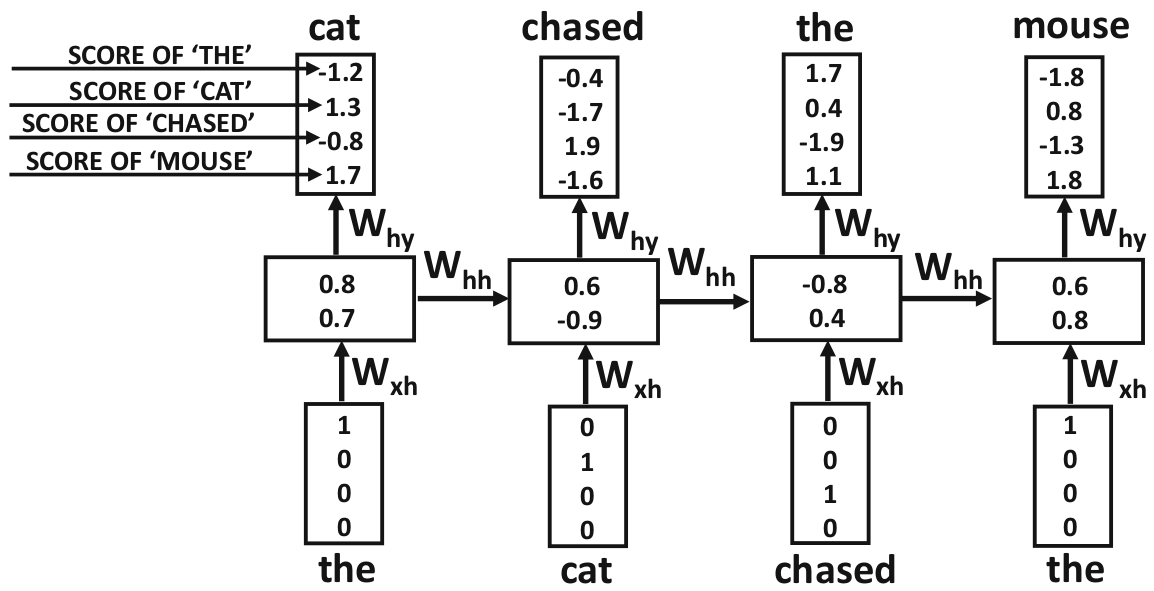

In [8]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./img/rnn3.png",width=600, height=600)

### Generating a Language Sample

Such an approach can also be used to generate an arbitrary sample of a language, once the
training has been completed. How does one use such a language model at testing time, since
each state requires an input word, and none is available during language generation? The
likelihoods of the tokens at the first time-stamp can be generated using the \<START\> token
as input. Since the \<START\> token is also available in the training data, the model will
typically select a word that often starts text segments. Subsequently, the idea is to sample
one of the tokens generated at each time-stamp (based on the predicted likelihood), and
then use it as an input to the next time-stamp. To improve the accuracy of the sequentially
predicted token, one might use beam search to expand on the most likely possibilities by
always keeping track of the b best sequence prefixes of any particular length.
    
By recursively applying this operation, one can generate an
arbitrary sequence of text that reflects the particular training data at hand. If the \<END\>
token is predicted, it indicates the end of that particular segment of text. Although such an
approach often results in syntactically correct text, it might be nonsensical in meaning. For
example, a character-level RNN 1 authored by Karpathy, Johnson, and Fei Fei  was
trained on William Shakespeare’s plays. A character-level RNN requires the neural network
to learn both syntax and spelling. After only five iterations of learning across the full data
set, the following was a sample of the output:

    KING RICHARD II:
    Do cantant,-’for neight here be with hand her,-
    Eptar the home that Valy is thee.
    NORONCES:
    Most ma-wrow, let himself my hispeasures;
    An exmorbackion, gault, do we to do you comforr,
    Laughter’s leave: mire sucintracce shall have theref-Helt.

Note that there are a large number of misspellings in this case, and a lot of the words are
gibberish. However, when the training was continued to 50 iterations, the following was
generated as a part of the sample:

    KING RICHARD II:
    Though they good extremit if you damed;
    Made it all their fripts and look of love;
    Prince of forces to uncertained in conserve
    To thou his power kindless. A brives my knees
    In penitence and till away with redoom.
    GLOUCESTER:
    Between I must abide.

This generated piece of text is largely consistent with the syntax and spelling of the archaic
English in William Shakespeare’s plays, although there are still some obvious errors. Fur-
thermore, the approach also indents and formats the text in a manner similar to the plays
by placing new lines at reasonable locations. Continuing to train for more iterations makes
the output almost error-free.

Of course, the semantic meaning of the text is limited, and one might wonder about
the usefulness of generating such nonsensical pieces of text from the perspective of machine
learning applications. The key point here is that by providing an additional contextual
input, such as the neural representation of an image, the neural network can be made to
give intelligent outputs such as a grammatically correct description (i.e., caption) of the
image. In other words, language models are best used by generating conditional outputs.

The primary goal of the language-modeling RNN is not to create arbitrary sequences
of the language, but to provide an architectural base that can be modified in various ways
to incorporate the effect of the specific context. For example, applications like machine
translation and image captioning learn a language model that is conditioned on another
input such as a sentence in the source language or an image to be captioned. Therefore,
the precise design of the application-dependent RNN will use the same principles as the
language-modeling RNN, but will make small changes to this basic architecture in order
to incorporate the specific context.

Also I have a [very simple language model](https://github.com/safakkbilici/Simple-Language-Model-With-LSTM) based on the bible:

    And all that he touched them will kindle commanded us out arm, to afflict the captivity of death. 

    stones: not right shoulder: behold them, and 
    after me, as I will cause my defence; I have vowed. 
    18:11 though he removed my womb, and thou lovedst that 
    Jehoiachin exceeding joy: And there be as it 
    Moses, Wherefore our oppression: and he whom God of Rabshakeh, 
    thou exalt thee one of all the Egyptians shall I took they shall rise up, and 
    my partner the least esteemed them out the abominable, and sing praise 
    of Dan. 
    1:15 that there be as to hurt the scribes sitting on the son of the woman: Wherefore kick against Israel, saying might 
    all thy servants, I am not on an 
    the book of Israel; but raw. 
    every 
    within, and over the son of the sight of Israel, whom 
    LORD, thou lovedst his brethren in this man's seed in sacrifice of Jehoiakim, commanded thee and she beareth them: 16:54 see that thy mother, and Omega, the congregation in the 
    burn incense before him, but raw. 

    6:1 And this sort; and I found left her, and the people, and from man. 
    there is Cush; full years, and  them, to him, and this should be to him in thine heart to bear his own city on mine enemies, which no man to condemn him walking through him unto you, to Babylon. And the singers had wives of Reuben until the son of Judas Iscariot brought her house, and Mushi. And we do all 
    10:35 Then said unto me the firstborn and hath chosen her seed; desire to keep, For the 
    4:13 Jesus answered and behind thee, which ruled over our God to condemn him 
    shall keep all your same night thy word of trumpets, and with me? 9:22 9:5 For thou hast brought you for the sound of Uzzi, what shall be angry, not for as a door of Israel? God hath made bread. 
    possessed with hearing. 
    for in the work in the saints, and ever. 
    14:12 When Jesus of her away. 


### Backpropagation Through Time

One can look at my post about [Training Bidirectional Recurrent Neural Networks](https://safakkbilici.github.io/training-bidirectional-rnns/), it is about backpropagation on bi-directional RNNs but it is nearly same with vanilla RNNs.

### Multilayer RNNs

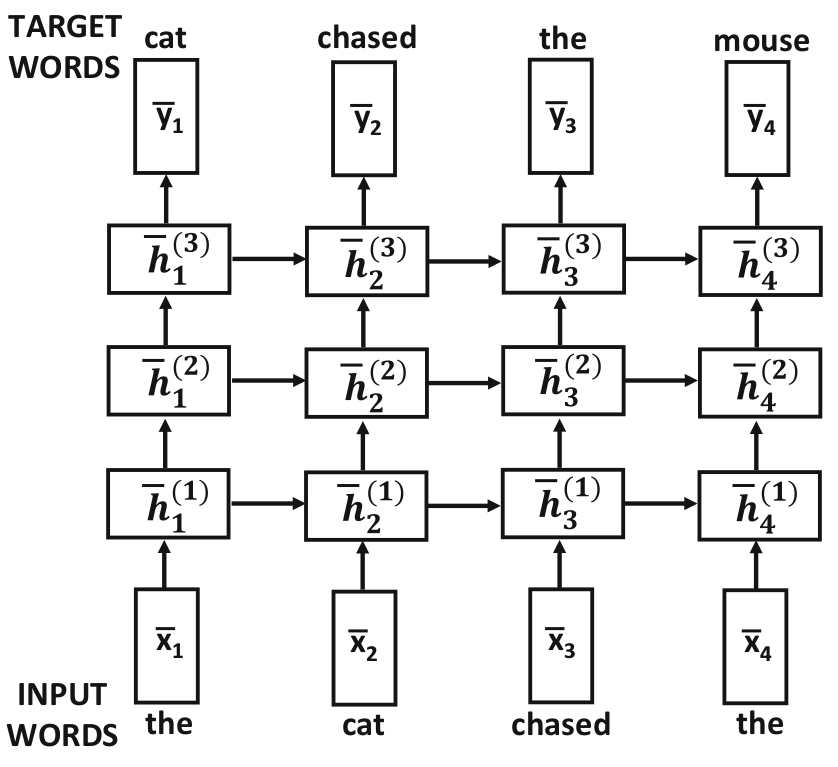

In [11]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./img/rnn4.png",width=400, height=400)

### Bi-directional RNNs

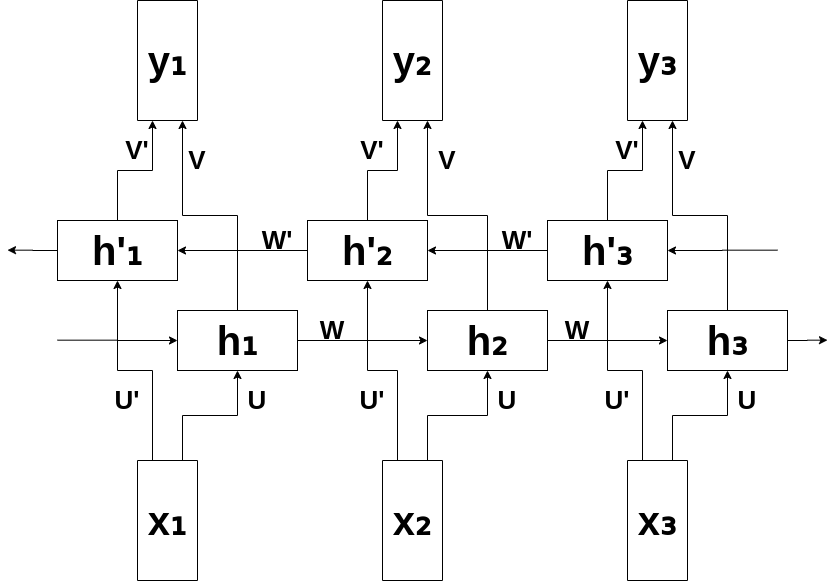

In [13]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(filename= "./img/rnn5.png",width=600, height=600)

$$h_t = tanh(U x_t + W h_{t-1})$$

$$h_t' = tanh(U' x_t + W' h_{t+1}')$$

$$\hat{y}_t = softmax(V h_t + V' h_t')$$

## Canonical Recurrent Neural Networks (LSTMs, GRUs, Echo State)